In [8]:
import numpy as np
import Vanilla_CNN
import torch
import torchvision
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Construct dataset (MNIST)

In [2]:
root = '/Users/justinpyron/Google Drive/Stanford/Miscellaneous_Python'
mnist_train = torchvision.datasets.MNIST(root, train=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root, train=False, transform=torchvision.transforms.ToTensor())

subset_size = 5000
train_set = torch.utils.data.Subset(mnist_train, range(subset_size))
test_set = torch.utils.data.Subset(mnist_test, range(subset_size))


In [3]:
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=32,
                                           shuffle=True,
                                           num_workers=4)

test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=4)


# Construct model

In [4]:
input_shape = (1,28,28)
filter_list = [12,12,16]
maxpool_list = [0,0,0]
fc_list = [100, 50, 10]
Conv_to_FC_method = 'flatten'
dropout_prob = 0.4

model = Vanilla_CNN.CNN(input_shape,
                        filter_list,
                        maxpool_list,
                        fc_list,
                        Conv_to_FC_method,
                        dropout_prob)


# Train model

In [20]:
optimizer = optim.Adam(model.parameters(), weight_decay=1e-3)

num_epoch = 10
train_accuracy_list = list()
test_accuracy_list = list()

for epoch in range(num_epoch):

    # Train model
    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(images)
        loss = F.nll_loss(output, labels)
        loss.backward()
        optimizer.step()
    
    # Evaluate model
    train_correct = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        output = model(images)
        pred = output.max(dim=1)[1]
        train_correct += (pred == labels).sum().float()
    train_accuracy = train_correct/len(train_set)
    train_accuracy_list.append(train_accuracy)

    test_correct = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        output = model(images)
        pred = output.max(dim=1)[1]
        test_correct += (pred == labels).sum().float()
    test_accuracy = test_correct/len(test_set)
    test_accuracy_list.append(test_accuracy)
        
    print('Epoch {} train accuracy: {:.3f}'.format(epoch, train_accuracy))
    print('Epoch {} test accuracy: {:.3f}'.format(epoch, test_accuracy))
    print('\n')


Epoch 0 train accuracy: 0.931
Epoch 0 test accuracy: 0.891


Epoch 1 train accuracy: 0.939
Epoch 1 test accuracy: 0.905


Epoch 2 train accuracy: 0.945
Epoch 2 test accuracy: 0.909


Epoch 3 train accuracy: 0.952
Epoch 3 test accuracy: 0.919


Epoch 4 train accuracy: 0.961
Epoch 4 test accuracy: 0.928


Epoch 5 train accuracy: 0.954
Epoch 5 test accuracy: 0.926


Epoch 6 train accuracy: 0.964
Epoch 6 test accuracy: 0.930


Epoch 7 train accuracy: 0.962
Epoch 7 test accuracy: 0.932


Epoch 8 train accuracy: 0.970
Epoch 8 test accuracy: 0.938


Epoch 9 train accuracy: 0.953
Epoch 9 test accuracy: 0.921




# Plot training results

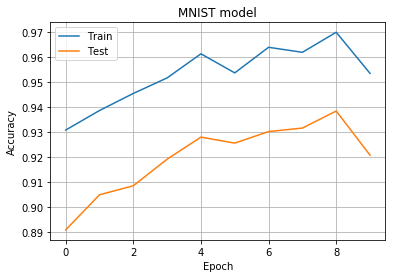

In [21]:
plt.figure()
plt.plot(train_accuracy_list, label='Train')
plt.plot(test_accuracy_list, label='Test')
plt.title('MNIST model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()